In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_csv('Data/Train_Test/X_train.csv').to_numpy()
y_train = pd.read_csv('Data/Train_Test/y_train.csv').to_numpy()
X_test = pd.read_csv('Data/Train_Test/X_test.csv').to_numpy()
y_test = pd.read_csv('Data/Train_Test/y_test.csv').to_numpy()

In [3]:
model = Sequential()

model.add(Dense(128,kernel_initializer='normal',input_dim = X_train.shape[1],activation = 'relu'))
model.add(Dense(256,kernel_initializer='normal',activation = 'relu'))
model.add(Dense(256,kernel_initializer='normal',activation = 'relu'))
model.add(Dense(256,kernel_initializer='normal',activation = 'relu'))
model.add(Dense(1,kernel_initializer='normal',activation = 'linear'))


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               896       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 165,761
Trainable params: 165,761
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer='adam',loss = 'mean_absolute_error',metrics = ['mean_absolute_error'])

In [6]:
hist = model.fit(X_train,y_train,epochs=100,validation_split=0.33,batch_size=16)

Epoch 1/100
33/33 [==============================] - 1s 22ms/step - loss: 79.3578 - mean_absolute_error: 79.3578 - val_loss: 74.6664 - val_mean_absolute_error: 74.6664
Epoch 2/100
33/33 [==============================] - 0s 7ms/step - loss: 69.9094 - mean_absolute_error: 69.9094 - val_loss: 67.8854 - val_mean_absolute_error: 67.8854
Epoch 3/100
33/33 [==============================] - 0s 8ms/step - loss: 64.7369 - mean_absolute_error: 64.7369 - val_loss: 64.4367 - val_mean_absolute_error: 64.4367
Epoch 4/100
33/33 [==============================] - 0s 8ms/step - loss: 62.3151 - mean_absolute_error: 62.3151 - val_loss: 63.6236 - val_mean_absolute_error: 63.6236
Epoch 5/100
33/33 [==============================] - 0s 8ms/step - loss: 61.6372 - mean_absolute_error: 61.6372 - val_loss: 66.1649 - val_mean_absolute_error: 66.1649
Epoch 6/100
33/33 [==============================] - 0s 7ms/step - loss: 61.5743 - mean_absolute_error: 61.5743 - val_loss: 63.1659 - val_mean_absolute_error: 63.16

Epoch 50/100
33/33 [==============================] - 0s 6ms/step - loss: 50.5430 - mean_absolute_error: 50.5430 - val_loss: 53.0271 - val_mean_absolute_error: 53.0271
Epoch 51/100
33/33 [==============================] - 0s 6ms/step - loss: 50.4337 - mean_absolute_error: 50.4337 - val_loss: 54.1550 - val_mean_absolute_error: 54.1550
Epoch 52/100
33/33 [==============================] - 0s 7ms/step - loss: 52.3487 - mean_absolute_error: 52.3487 - val_loss: 56.0768 - val_mean_absolute_error: 56.0768
Epoch 53/100
33/33 [==============================] - 0s 7ms/step - loss: 53.7583 - mean_absolute_error: 53.7583 - val_loss: 56.4787 - val_mean_absolute_error: 56.4787
Epoch 54/100
33/33 [==============================] - 0s 7ms/step - loss: 51.6050 - mean_absolute_error: 51.6050 - val_loss: 55.5191 - val_mean_absolute_error: 55.5191
Epoch 55/100
33/33 [==============================] - 0s 7ms/step - loss: 51.0758 - mean_absolute_error: 51.0758 - val_loss: 54.1718 - val_mean_absolute_error: 

Epoch 99/100
33/33 [==============================] - 0s 6ms/step - loss: 48.1142 - mean_absolute_error: 48.1142 - val_loss: 53.5166 - val_mean_absolute_error: 53.5166
Epoch 100/100
33/33 [==============================] - 0s 6ms/step - loss: 49.6938 - mean_absolute_error: 49.6938 - val_loss: 53.9299 - val_mean_absolute_error: 53.9299


In [7]:
pred = model.predict(X_test)

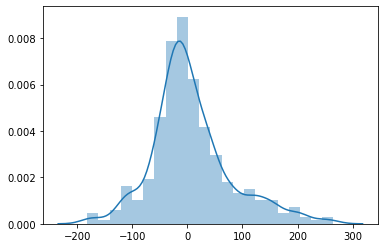

In [8]:
sns.distplot(y_test-pred)

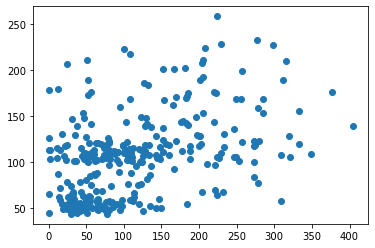

In [9]:
plt.scatter(y_test,pred)

In [10]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 52.61387709802972
MSE: 5366.203073972689
RMSE: 73.25437238808813


In [11]:
# open a file, where you ant to store the data
file = open('ANN.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)
file.close()

TypeError: can't pickle _thread.RLock objects